# Scaling and Fourier Transforms

**Version 0.1**


* * *

By J. S. Oishi (Bates College)

In [1]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt

## Problem 1) Implement a Simple Fourier Transform

The Fourier transform is one of the most important discoveries in applied math, with particular importance for the study of partial differential equations. Given that the majority of our models of the physical world are based on PDEs, this makes it important for studying the universe. Of course, it's had a few practical applications as well.

[This](https://betterexplained.com/articles/an-interactive-guide-to-the-fourier-transform/) is a very good introduction to the concept. 

For our purposes, though, let's just focus on the *discrete, forward* FT, aka the DFT

$$F_k = \sum_{j=0}^{N-1} f_j e^{-i \omega_k t_j}.$$

This takes a series of data $f_j$ and produces another series of data $F_k$. The data must be sampled at equidistant points, that is $\Delta t$ must be constant. The DFT *assumes* the data $[f_0, f_1, \dots, f_{N-1}]$ is periodic. NB: I am here using the DFT assuming the data is a time signal and we are producing a frequency domain; this can be thought of as sampling a spatial direction $x$ with wavenumbers $k$  The frequencies are given by 

$$\omega_k = \frac{2\pi k}{T}$$,

where is the total duration of the signal, and $-N/2 < k < N/2$. For simplicity, we'll assume only even sized inputs.  

**Problem 1a**

Just looking at the definition of the DFT, attempt to determine the complexity of the algorithm. Write it down somewhere; discuss it with your friends. 

**Solution:** Each $F_k$ is $\mathcal{O}(N)$ and there are $N/2 - (-N/2) = N$ values of $k$, so this algorithm is $\mathcal{O}(N^2)$.

**Problem 1b**
For computation, it helps to notice that $F_k$ represents the $k$th element of an output array $F$ and similarly, $f_j$ is the $j$th element of the input array $f$. Thus, we can write the DFT as a matrix multiplication problem:

$$\mathbf{F} = \mathbf{\mathcal{A}} \mathbf{f},$$

where $\mathbf{\mathcal{A}}$ is a square $N \times N$ matrix. The complexity of the algorithm should now be quite obvious. **Was your guess correct?**

Now, find $\mathbf{\mathcal{A}}$ by writing $\mathcal{A}_{jk}$ (*note we avoid $i$ as an index to avoid confusion with $i = \sqrt{-1}$*).

There is a VERY interesting property you should find when you calculate $\mathbf{\mathcal{A}}_{ij}$. It is related to the fact that the call signature for the `simple_ft` below only includes the data itself, and not the times the data is sampled at.

**Solution:** $\mathcal{A}_{jk} = e^{-i \omega_k t_j}$

**Problem 1c**

Now, we need to make sure we use numpy's array features to ensure your DFT function is not unusably slow (remember, complexity only deals with the asymptotic behavior of a function!).

Once you have $\mathbf{\mathcal{A}}_{ij}$, fill in the function definition for `simple_ft`.

Questions to think about while writing this function:
 * Have I avoided all loops? (there should be NO loops in this function)
 * Could I make this an object and store $\mathbf{\mathcal{A}}$ during initialization?
 * What should the shape of `A` be? 

*Hints are hidden in this cell. Reveal them if you need them!*

<!-- 
*Hint: you should use the `.dot()` method of the `A` matrix.*
*Another hint: Use the fact that an array of shape (10,1) is different than an array of shape (10) and different from an array of shape (1,10), but the `.reshape`  method allows you to turn one into the other.
-->

In [52]:
def simple_ft(f):
    """given an (in general) complex array f, return the discrete fourier transform, F.
    """
    N = len(f)
    j = np.arange(N).reshape(N,1)
    k = np.arange(N).reshape(1,N)
    
    #first get an omega array
    A = np.exp(-1. * 1j * 2. * np.pi * k * j / N)
    
    #now use matrix multiplication to get F as a vector
    F = A.dot(f)
    
    return F

Once you have this, test it against this data. The correct solution is given in `test_ft_data`. Make a plot showing that your solution matches the test data.

In [17]:
t = np.linspace(0, 2*np.pi,10,endpoint=False)
f = np.sin(t)

In [18]:
test_ft_data = np.array([ 1.22464680e-16+0.00000000e+00j, -5.50355954e-16-5.00000000e+00j,
  1.22464680e-16-2.22044605e-16j,  1.94404292e-16+2.86638918e-16j,
  1.22464680e-16-0.00000000e+00j,  9.95799250e-17+0.00000000e+00j,
  1.22464680e-16+0.00000000e+00j,  1.94404292e-16-2.86638918e-16j,
  1.22464680e-16+2.22044605e-16j, -5.50355954e-16+5.00000000e+00j])

In [53]:
f_c = simple_ft(f)

<IPython.core.display.Javascript object>


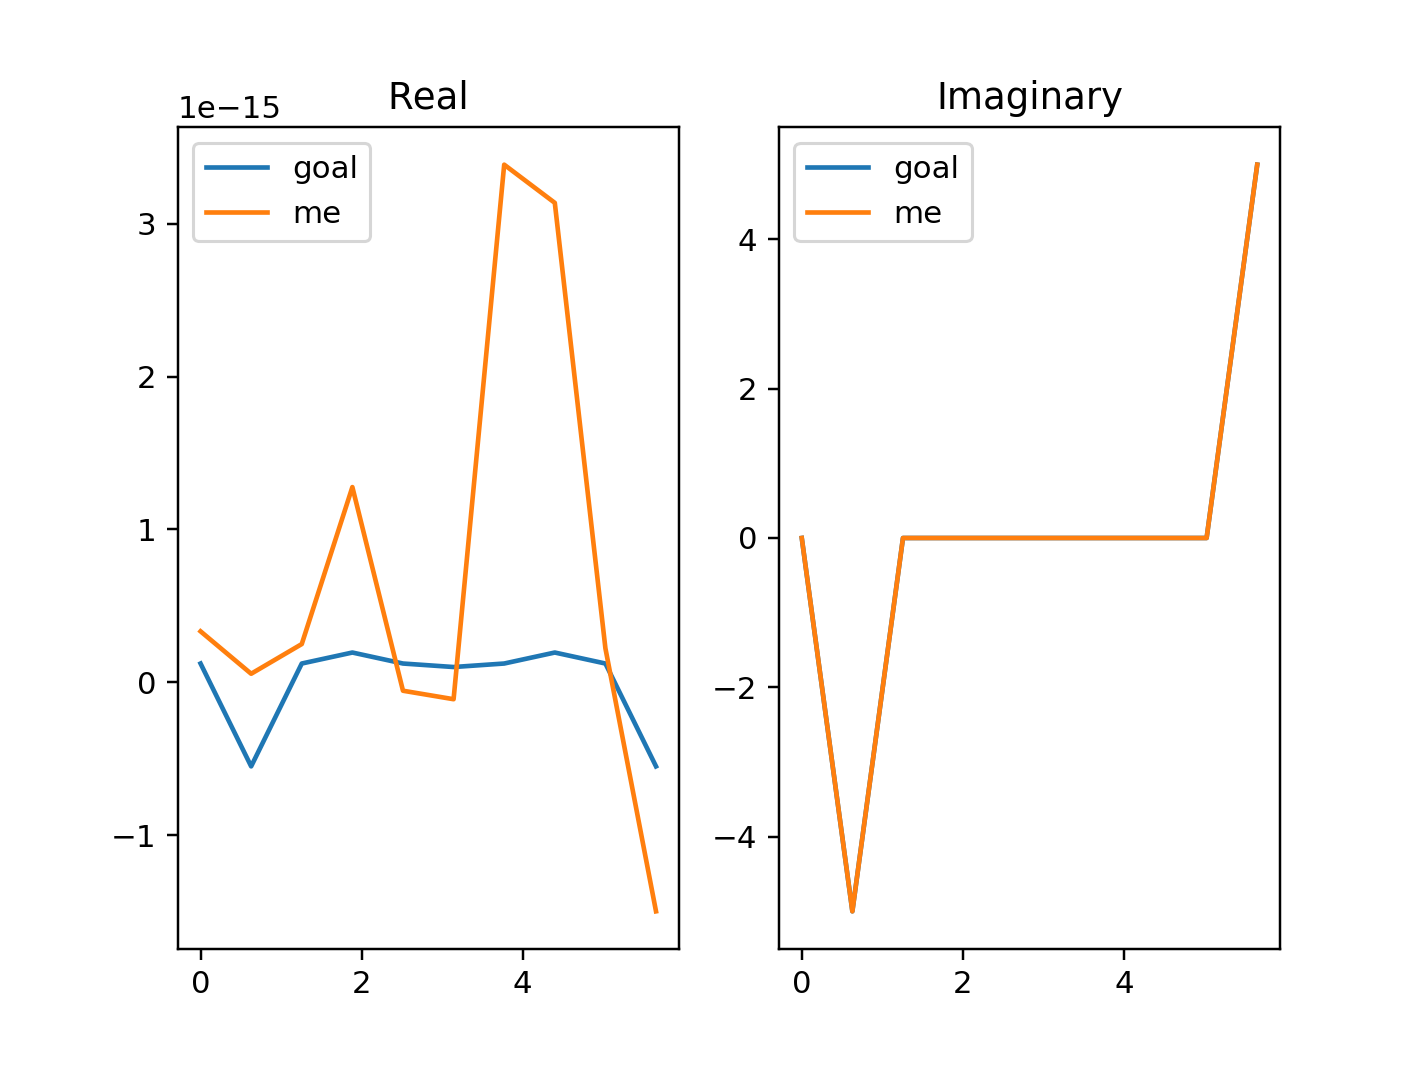

In [54]:
fig, (ax1, ax2) = plt.subplots(1,2)
ax1.plot(t, test_ft_data.real, label='goal')
ax1.plot(t, f_c.real, label='me')
ax1.set_title("Real")
ax1.legend()
ax2.plot(t, test_ft_data.imag, label='goal')
ax2.plot(t, f_c.imag, label='me')
ax2.set_title("Imaginary")
ax2.legend()

## Problem 2) Asymptotics of the *Fast* Fourier Transform

You have likely heard of the "FFT", or "fast fourier transform." This is an *algorithm* for calculating the discrete fourier transform; you have already coded a different one. We are going to see 

Now, with your `simple_ft` function in hand, run it on data sets increasing in size over at least two orders of magnitude with `%timeit -o`.

Do the same thing but use `np.fft.fft` on the exact same data. Plot both run times (appropriately normalized, as we did in the lecture) on the same log-log plot. 

Do you see anything interesting?

In [40]:
s_10 = %timeit -o simple_ft(np.sin(np.linspace(0, 2*np.pi, 10, endpoint=False)))
s_100 = %timeit -o simple_ft(np.sin(np.linspace(0, 2*np.pi, 100, endpoint=False)))
s_1000 = %timeit -o simple_ft(np.sin(np.linspace(0, 2*np.pi, 1000, endpoint=False)))
s_10000 = %timeit -o simple_ft(np.sin(np.linspace(0, 2*np.pi, 10000, endpoint=False)))

s_times = [x.average for x in [s_10, s_100, s_1000, s_10000]]

44.8 µs ± 5.46 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)
359 µs ± 33 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
24 ms ± 1.68 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
3.74 s ± 79.4 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [41]:
n_10 = %timeit -o np.fft.fft(np.sin(np.linspace(0, 2*np.pi, 10, endpoint=False)))
n_100 = %timeit -o np.fft.fft(np.sin(np.linspace(0, 2*np.pi, 100, endpoint=False)))
n_1000 = %timeit -o np.fft.fft(np.sin(np.linspace(0, 2*np.pi, 1000, endpoint=False)))
n_10000 = %timeit -o np.fft.fft(np.sin(np.linspace(0, 2*np.pi, 10000, endpoint=False)))

n_times = [x.average for x in [s_10, s_100, s_1000, s_10000]]

21.6 µs ± 1.28 µs per loop (mean ± std. dev. of 7 runs, 100000 loops each)
23.8 µs ± 2.47 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)
38.9 µs ± 2.58 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)
160 µs ± 6.17 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


<IPython.core.display.Javascript object>


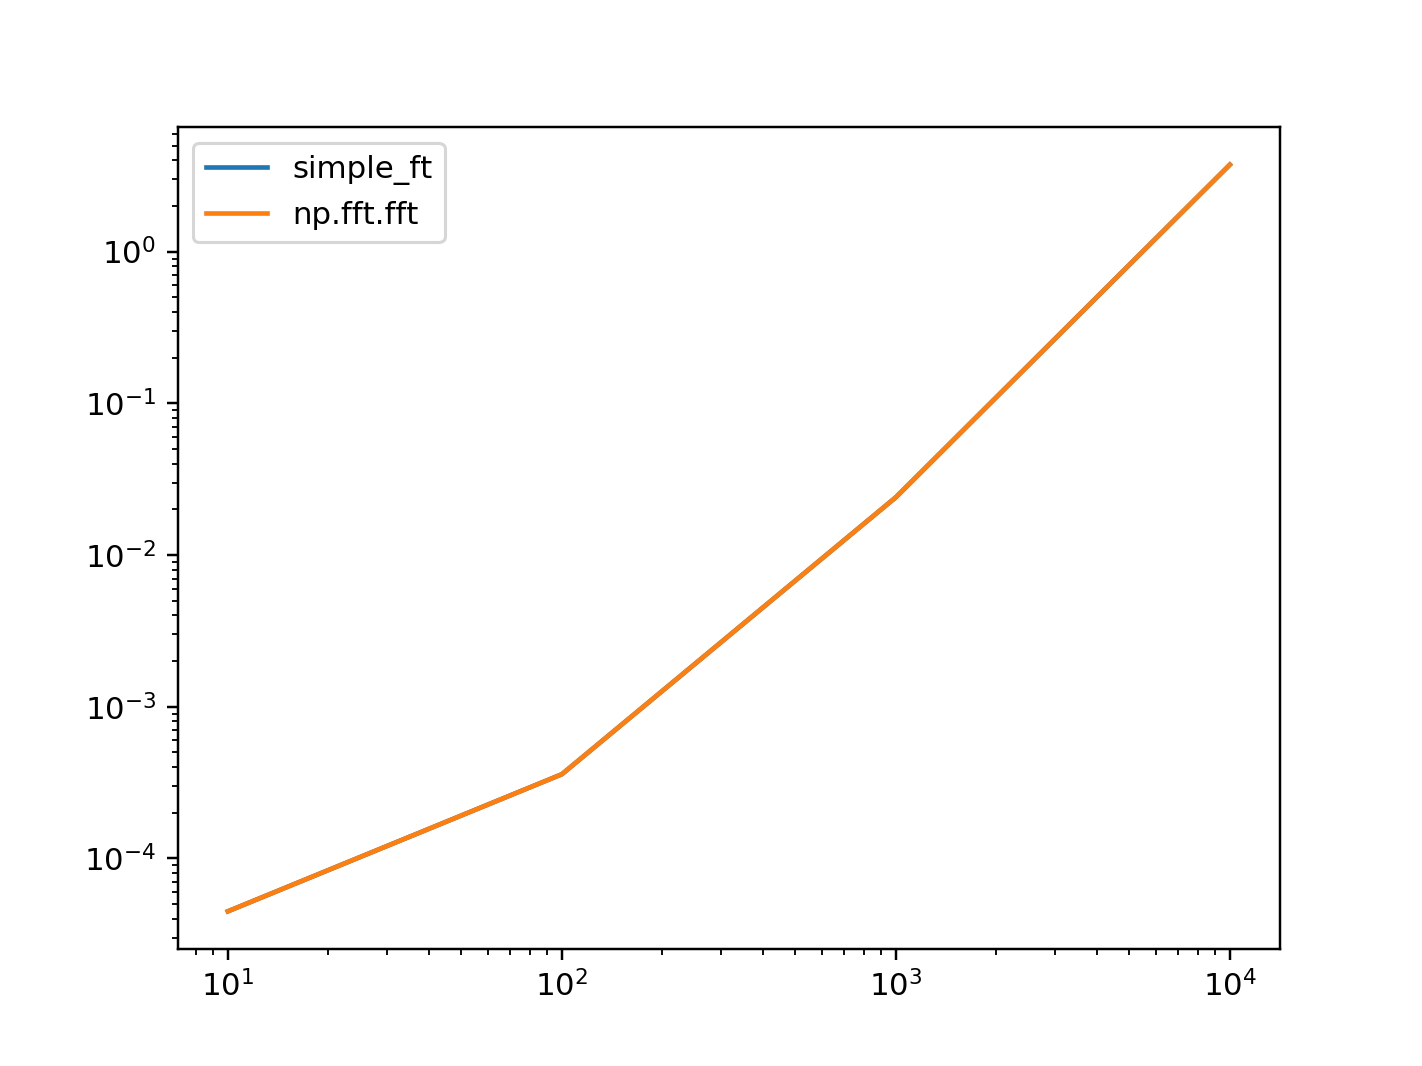

In [43]:
plt.figure()
plt.loglog([10, 100, 1000, 10000], s_times, label='simple_ft')
plt.loglog([10, 100, 1000, 10000], n_times, label='np.fft.fft')
plt.legend()

## Challenge Problem

* If you haven't already, replace the $O(N^2)$ brute-force gravitational force calculator from Monday with a Fast Multipole Method
* Try to build a speed-competitive simple Fourier Transform algorithm (use an object to cache the matrix construction). Then race it against FFT. Do you see where they cross over (because at small $N$ prefactors matter, and asymptotics can lead us astray!)
* Spherical harmonics have all of the power of spectral methods defined on the surface of the 2-sphere. However, they have no known fast transform (this is not quite true; see [here](), but it's an active area of research). Adapt your simple DFT calculator to do the Legendre transform for spherical harmonics. 

In [ ]:
# no code snippets provided here